In [1]:
from wraptrain import ReadImage,OriginModNetDataLoader,ImageMatteLoader,ModNetImageGenerator,NetTrainer
base_path = "/mnt/data/Train/"
fg = base_path+"FG"
matte= base_path+"Alpha"
files = ReadImage(fg,matte).read_same_names()

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-04 20:05:51.822618: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 20:05:51.870918: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 20:05:51.870948: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 20:05:51.870975: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alrea

In [2]:
from wrapown import  OwnNetTrainer
from src.models.finitenetsmall import FiniteNet
begin = FiniteNet()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
all_data = OriginModNetDataLoader(files,[512,512],hot_path=base_path+"newHeatmaps.pt")
model = begin.to("cuda")

In [4]:
files["FG"][7]

'/mnt/data/Train/FG/0007.png'

In [5]:
begin_dream = OwnNetTrainer(model,ckpt_path="tests/checkpoint_5.pth")

Loaded checkpoint from tests/checkpoint_5.pth.


tensor([[256.0000, 320.0000,   0.9964],
        [224.0000, 256.0000,   1.0036],
        [224.0000, 352.0000,   1.0261],
        [256.0000, 256.0000,   1.0380],
        [224.0000, 320.0000,   0.9756],
        [192.0000, 288.0000,   0.9889],
        [192.0000, 256.0000,   0.9578],
        [192.0000, 384.0000,   0.9958],
        [192.0000, 320.0000,   0.9894],
        [256.0000, 320.0000,   0.9982],
        [224.0000, 288.0000,   1.0304],
        [224.0000, 320.0000,   0.9815],
        [160.0000, 352.0000,   0.9587],
        [224.0000, 256.0000,   1.0116],
        [256.0000, 288.0000,   0.9626],
        [224.0000,  96.0000,   0.9630],
        [256.0000, 320.0000,   1.0201]], device='cuda:0',
       grad_fn=<SelectBackward0>)


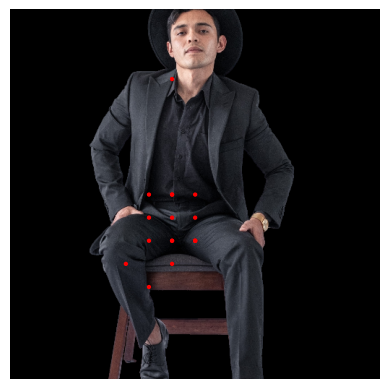

In [6]:
all_data.show_with_key(idx=12,model=begin_dream.get_model())

In [19]:
dream = ModNetImageGenerator(files,FiniteNet())

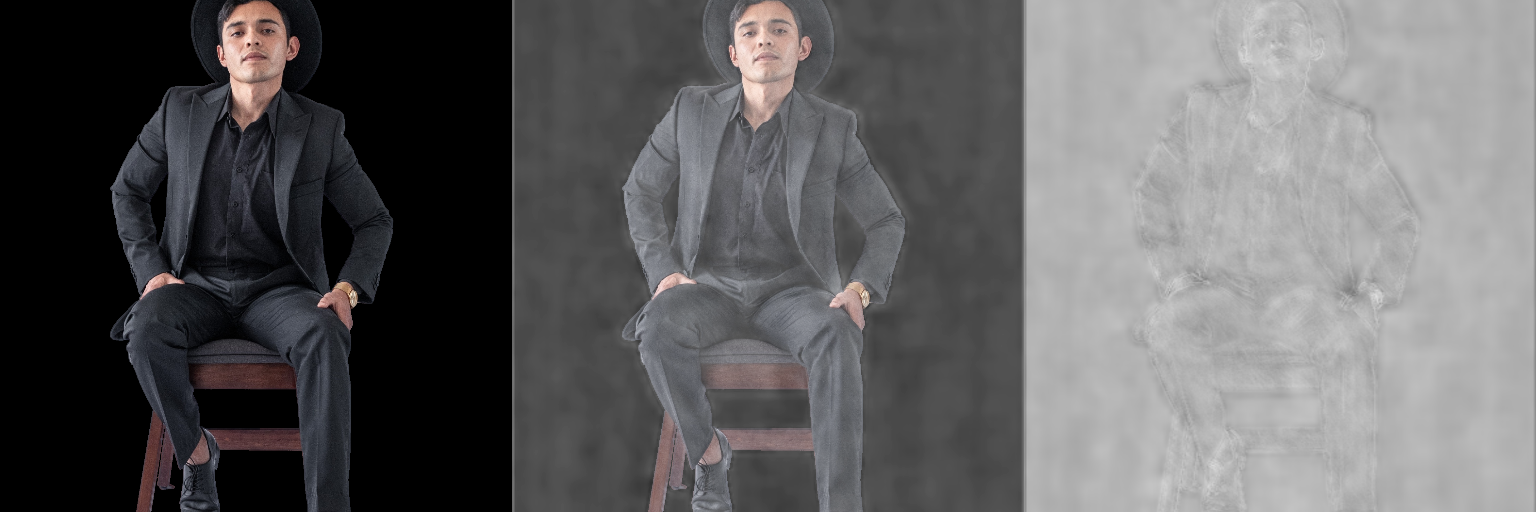

(<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=L size=512x512>)

In [20]:
dream.show(12,[512,512])

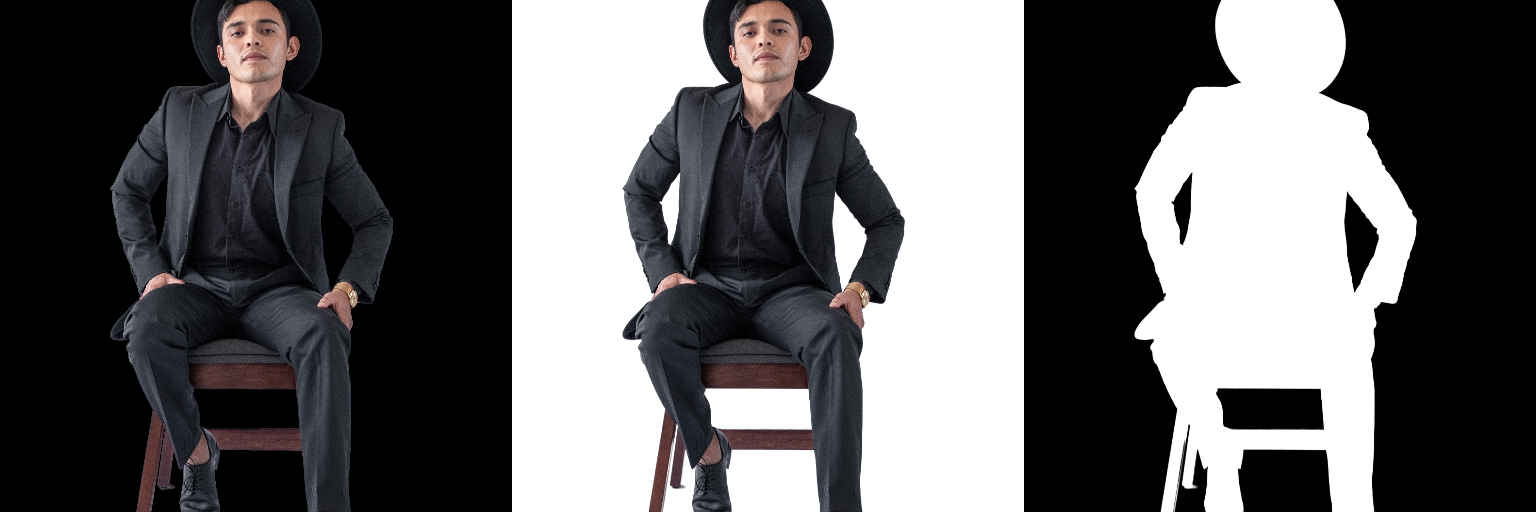

(<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=L size=512x512>)

In [15]:
see = ImageMatteLoader(files)
see.show(12,[512,512])

In [7]:
!ls "tests"

checkpoint_5.pth


In [8]:
#begin_dream.train_with_key(all_data,epochs=5,checkpoint_dir="tests",batch_size=16)